In [1]:
# 기본 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
import statsmodels.api as sm
import scipy
import pickle

In [2]:
# matplotlib 사용 시 한글 깨짐 문제 해결
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [3]:
# 경고 메시지 비활성화
import warnings

warnings.filterwarnings("ignore")

In [4]:
# 경로 확인
path = os.getcwd()
print(path)

C:\Users\lsc\Desktop\ADP\ADP_study\4주차\hyejoo


# Part 1. 머신러닝

## (1) 데이터 탐색

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv", engine = 'python')

In [6]:
df.head(10)

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
5,0,No Deposit,116.0,2,4,0.0,0,0,0,0,88.40
6,0,No Deposit,41.0,1,2,0.0,0,0,0,0,105.90
7,0,No Deposit,219.0,1,2,NaN,0,0,0,0,76.67
8,0,No Deposit,55.0,0,2,0.0,0,0,1,0,84.00
9,0,No Deposit,20.0,2,5,0.0,0,0,0,0,42.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


1) 전체 데이터 수 : 20,000개  
2) 전체 feature의 수 : 11개
 - 종속변수 y : 'is_canceled'(취소 여부)로 추정됨. (범주형 변수)  
3) 결측치 수  
 - lead_time 5개  
 - is_repeated_guest 358개
 - adr 1,063개  
4) 데이터 타입  
 - int(정수형), float(실수형), object(객체 / 모든 종류의 데이터)

In [8]:
round(df.describe(), 3)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.000,19995.000,20000.000,20000.000,19642.000,20000.000,20000.000,20000.000,20000.000,18937.000
mean,0.120,85.978,0.893,2.380,0.038,0.033,0.169,0.269,1.984,101.410
std,0.325,96.427,0.952,1.777,0.192,0.456,1.502,0.688,15.927,49.245
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-6.380
25%,0.000,11.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,68.800
50%,0.000,51.000,1.000,2.000,0.000,0.000,0.000,0.000,0.000,94.500
75%,0.000,132.000,2.000,3.000,0.000,0.000,0.000,0.000,0.000,126.000
max,1.000,629.000,13.000,30.000,1.000,26.000,66.000,17.000,379.000,451.500


In [9]:
# 종속변수인 'is_canceled'는 범주형 변수이므로, Category형으로 변경하고 진행한다.
# df['is_canceled'] = df['is_canceled'].astype('category')

df['is_canceled'].value_counts()

0    17600
1     2400
Name: is_canceled, dtype: int64

Imbalanced Data이다.  
추후 Oversampling이나 Undersampling이 필요할 것으로 보이는데,  
데이터의 양을 보면 Oversampling을 하는 것이 ML 모델 학습에 더 유리할 것으로 추정된다.

In [10]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [11]:
# 'deposit_type', 'is_repeated_guest'도 범주형이다. 데이터를 간소화하기 위하여 다음과 같이 처리한다.
def set_category(x) :
    if x == df['deposit_type'].unique()[0] : 
        return 0
    elif x == df['deposit_type'].unique()[1] : 
        return 1
    else : 
        return 2
        
df['deposit_type'] = df['deposit_type'].apply(lambda x : set_category(x))
    # 사용자 정의 함수로 mapping하는 과정에서, unique()를 각 try마다 진행하기 때문에
    # 실행시간이 지연되는 것 같다. Pipeline 구축이 아닌 이상 그냥 값을 구해서 함수에 직접 넣어야겠다.

# df['deposit_type'] = df['deposit_type'].astype('category')
# df['is_repeated_guest'] = df['is_repeated_guest'].astype('category')

In [12]:
# 대부분(약 95.7%) 보증금이 없다고 한다.
# 그리고 대부분(약 94.5%) 최초 방문객이라 한다.
print(df['deposit_type'].value_counts().max() / len(df))
print(df['is_repeated_guest'].value_counts().max() / len(df))

df['deposit_type'].value_counts()

0.9569
0.94465


0    19138
2      834
1       28
Name: deposit_type, dtype: int64

In [13]:
df['is_repeated_guest'].value_counts()

0.0    18893
1.0      749
Name: is_repeated_guest, dtype: int64

In [14]:
# 사실 'deposit_type' 변수는 총 범주의 수가 3개이기 때문에, One-hot Encoding으로 처리하여도 Sparsity 문제는 크지 않을 것 같다.
# 1) pd.get_dummies / 2) sklearn.preprocessing의 OneHotEncoder 등 존재 (방법이 더 있다고 함.)

In [15]:
round(df.corr()[np.abs(df.corr()) > 0.2], 3)

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
is_canceled,1.000,0.546,0.212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deposit_type,0.546,1.000,0.260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,0.212,0.260,1.000,NaN,0.227,NaN,NaN,NaN,NaN,NaN,NaN
stays_in_weekend_nights,NaN,NaN,NaN,1.000,0.441,NaN,NaN,NaN,NaN,NaN,NaN
stays_in_week_nights,NaN,NaN,0.227,0.441,1.000,NaN,NaN,NaN,NaN,NaN,NaN
is_repeated_guest,NaN,NaN,NaN,NaN,NaN,1.000,NaN,0.467,NaN,NaN,NaN
previous_cancellations,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.229,NaN,NaN,NaN
previous_bookings_not_canceled,NaN,NaN,NaN,NaN,NaN,0.467,0.229,1.000,NaN,NaN,NaN
booking_changes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
days_in_waiting_list,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


그런데, 지금까지는 그룹을 구분짓지 않고 탐색을 진행한 결과이다.  
종속변수에 따라 그룹을 구분지어 탐색하면 어떤 결과가 나올까?

In [16]:
df_grouped = df.groupby('is_canceled')

In [17]:
df_grouped_0 = df_grouped.get_group(0)
df_grouped_1 = df_grouped.get_group(1)

In [18]:
df_grouped_1

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
17600,1,2,142.0,2,3,0.0,0,0,0,0,103.00
17601,1,2,69.0,2,4,0.0,0,0,0,0,120.00
17602,1,0,203.0,0,3,0.0,0,0,0,0,138.02
17603,1,2,175.0,0,1,0.0,0,0,0,0,90.00
17604,1,0,43.0,0,1,0.0,0,0,0,0,168.30
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,2,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,2,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,0,0.0,0,1,0.0,0,0,0,0,209.00


In [19]:
# Case 1. 종속변수 값이 0인 경우
round(df_grouped_0.describe(), 3)

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,17600.0,17600.000,17595.000,17600.000,17600.000,17285.000,17600.000,17600.000,17600.000,17600.000,16664.000
mean,0.0,0.004,78.420,0.889,2.361,0.041,0.013,0.190,0.293,1.737,101.035
std,0.0,0.078,90.151,0.944,1.767,0.199,0.238,1.595,0.711,15.319,49.884
min,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-6.380
25%,0.0,0.000,8.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,68.000
50%,0.0,0.000,44.000,1.000,2.000,0.000,0.000,0.000,0.000,0.000,94.000
75%,0.0,0.000,121.000,2.000,3.000,0.000,0.000,0.000,0.000,0.000,126.000
max,0.0,2.000,542.000,13.000,30.000,1.000,11.000,66.000,17.000,330.000,451.500


In [20]:
print(df_grouped_0['deposit_type'].value_counts().max() / len(df_grouped_0))
print(df_grouped_0['is_repeated_guest'].value_counts().max() / len(df_grouped_0))

df_grouped_0['deposit_type'].value_counts()

0.9972727272727273
0.9413636363636364


0    17552
1       28
2       20
Name: deposit_type, dtype: int64

In [21]:
df_grouped_0['is_repeated_guest'].value_counts()

0.0    16568
1.0      717
Name: is_repeated_guest, dtype: int64

In [22]:
# Case 2. 종속변수 값이 1인 경우
round(df_grouped_1.describe(), 3)

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,2400.0,2400.000,2400.000,2400.000,2400.000,2357.000,2400.000,2400.000,2400.000,2400.000,2273.000
mean,1.0,0.678,141.388,0.920,2.522,0.014,0.178,0.016,0.093,3.792,104.162
std,0.0,0.947,119.997,1.006,1.848,0.116,1.135,0.359,0.443,19.733,44.196
min,1.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.0,0.000,47.750,0.000,1.000,0.000,0.000,0.000,0.000,0.000,74.800
50%,1.0,0.000,105.000,1.000,2.000,0.000,0.000,0.000,0.000,0.000,96.400
75%,1.0,2.000,210.000,2.000,3.000,0.000,0.000,0.000,0.000,0.000,125.000
max,1.0,2.000,629.000,9.000,24.000,1.000,26.000,12.000,8.000,379.000,450.000


In [23]:
print(df_grouped_1['deposit_type'].value_counts().max() / len(df_grouped_1))
print(df_grouped_1['is_repeated_guest'].value_counts().max() / len(df_grouped_1))

df_grouped_1['deposit_type'].value_counts()

0.6608333333333334
0.96875


0    1586
2     814
Name: deposit_type, dtype: int64

In [24]:
df_grouped_1['is_repeated_guest'].value_counts()

0.0    2325
1.0      32
Name: is_repeated_guest, dtype: int64

In [25]:
print(df_grouped_0['deposit_type'].value_counts().max() / len(df_grouped_0))
print(df_grouped_0['is_repeated_guest'].value_counts().max() / len(df_grouped_0))

df_grouped_0['deposit_type'].value_counts()

0.9972727272727273
0.9413636363636364


0    17552
1       28
2       20
Name: deposit_type, dtype: int64

In [26]:
df_grouped_0['is_repeated_guest'].value_counts()

0.0    16568
1.0      717
Name: is_repeated_guest, dtype: int64

## (2) 결측치 탐색, 대체 방법 제시

In [27]:
df_null_col = df.isnull().sum()[df.isnull().sum() > 0]
df_null_col

lead_time               5
is_repeated_guest     358
adr                  1063
dtype: int64

In [28]:
# (결측치가 존재하는) 각 변수에 대하여 결측치 비율을 계산한다.
for col in df_null_col.index : 
    print(f"{col}의 결측치 비율 : {df[col].isnull().sum()/len(df)}")

lead_time의 결측치 비율 : 0.00025
is_repeated_guest의 결측치 비율 : 0.0179
adr의 결측치 비율 : 0.05315


결측치 비율이 모두 매우 작은 편이다.  

결측치가 있는 행을 모두 없애는 방법이 있을 수 있으나 자칫 약 7%에 해당하는 데이터가 한 번에 삭제되어 정보 손실이 발생할 수 있으므로,  
그룹별 평균값(범주형 변수의 경우 최빈값)으로 대체하였다.

In [29]:
df[df['lead_time'].isnull()]

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
985,0,0,NaN,0,3,0.0,0,0,2,0,24.00
1087,0,0,NaN,2,6,0.0,0,0,1,0,99.68
4125,0,0,NaN,0,2,0.0,0,0,0,0,46.00
4923,0,0,NaN,1,4,0.0,0,0,0,0,129.60
16221,0,0,NaN,0,1,0.0,0,0,1,0,199.00


In [30]:
df[df['adr'].isnull()]['is_canceled'].value_counts()

0    936
1    127
Name: is_canceled, dtype: int64

In [31]:
for col in ['lead_time', 'adr'] : 
    imp_mean_0 = df_grouped_0[col].mean()
    imp_mean_1 = df_grouped_1[col].mean()
    
    print(imp_mean_0)
    print(imp_mean_1)

78.42028985507247
141.38833333333332
101.03484517522804
104.1623537175539


In [32]:
df.groupby('is_canceled').apply(lambda x : x.fillna(x.mean()))
df['is_repeated_guest'].fillna(0, inplace = True)

In [33]:
df['is_repeated_guest'].isnull().sum()

0

## (3) DQ 향상 방법 제안

- 이상치를 탐색 및 처리한다.
- 매우 불균형한 데이터이므로, Oversampling하여 각 클래스의 균형을 맞추어준다.

## (4) 데이터 불균형 시각화, 판단

([<matplotlib.axis.XTick at 0x163ac604430>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

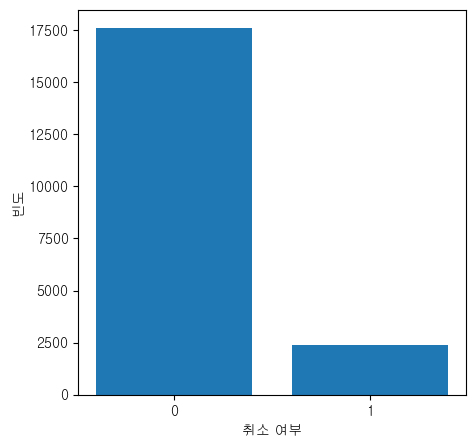

In [34]:
plt.figure(figsize = (5, 5))

plt.bar(df['is_canceled'].unique(), df['is_canceled'].value_counts())
plt.xlabel('취소 여부')
plt.ylabel('빈도')
plt.xticks([0, 1])

In [35]:
print(f"Class 0 : {df['is_canceled'].value_counts()[0] / len(df)}")
print(f"Class 1 : {df['is_canceled'].value_counts()[1] / len(df)}")

df['is_canceled'].value_counts()

Class 0 : 0.88
Class 1 : 0.12


0    17600
1     2400
Name: is_canceled, dtype: int64

Class 0는 전체의 약 88%로, 대부분을 차지하고 있다.  
불균형 데이터로 볼 수 있으며 이는 학습에도 영향을 미치기 때문에 별도 보정이 필요하다.  

## (5) Oversampling 기법을 설명, 비교하고 선택하기

Oversampling은 불균형 데이터에서 상대적으로 수가 적은 Minority Class를 Majority Class의 수에 맞게 데이터를 추가적으로 생성하는 방식을 통해 과적합을 방지하는 기법이다.

Oversampling에는 다음과 같은 방법들이 있다.

1) Random Sampling : Minority Class의 데이터 중 무작위로 선택하여 복사하는 방식으로 데이터를 추가 생성한다.  
2) SMOTE : KNN을 활용한 방법으로, 가까운 K개의 데이터 중 하나를 랜덤으로 선택하여 추가 데이터화한다. Minority Class에 속한 모든 데이터들에 대해서 실시한다.  
3) Borderline SMOTE : Minority Class의 데이터의 K개 근접 데이터 중 Majority Class의 데이터의 수를 확인한다. 근접한 Majority Class 데이터의 수가 많은 데이터에 대해서만 SMOTE를 적용한다.  
4) ADASYN : Borderline SMOTE와 유사하나, Scaling 과정을 추가하였다.
5) GAN : 생성자가 가짜 데이터를 생성하고 구분자가 이를 구별하여 피드백을 주는 방식으로 모델을 성장시켜간다.  

이 중 가장 간단한 Random Sampling, 그리고 범용성 있는 SMOTE를 사용하도록 한다.

* 참조 : https://casa-de-feel.tistory.com/15

## (6) Oversampling이 적용된 데이터셋을 생성

In [36]:
from imblearn.over_sampling import SMOTE


smote = SMOTE()

In [37]:
df['adr'].fillna(df['adr'].mean(), inplace = True)
df['lead_time'].fillna(df['lead_time'].mean(), inplace = True)

df_x = df.drop('is_canceled', axis = 1)
df_y = df['is_canceled']

In [38]:
# SMOTE가 적용된 데이터셋 생성
df_x_smote, df_y_smote = smote.fit_resample(df_x, df_y)

In [39]:
# 단순 Resampling 적용 데이터셋 생성
df_minor = df[df['is_canceled'] == 1].sample(15200, replace = True)

In [40]:
df_re = pd.concat([df[df['is_canceled'] == 0], df_minor], axis = 0)
df_re['adr'].fillna(df_re['adr'].mean(), inplace = True)

df_x_res = df_re.drop('is_canceled', axis = 1)
df_y_res = df_re['is_canceled']

## (7) 모델 생성, 학습

In [41]:
from sklearn.model_selection import train_test_split

df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y)
df_x_smote_train, df_x_smote_test, df_y_smote_train, df_y_smote_test = train_test_split(df_x_smote, df_y_smote)
df_x_res_train, df_x_res_test, df_y_res_train, df_y_res_test = train_test_split(df_x_res, df_y_res)

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf, rf2, rf3 = RandomForestClassifier(), RandomForestClassifier(), RandomForestClassifier()

In [44]:
rf.fit(df_x_train, df_y_train)
rf2.fit(df_x_smote_train, df_y_smote_train)
rf3.fit(df_x_res_train, df_y_res_train)

pred1 = rf.predict(df_x_test)
pred2 = rf2.predict(df_x_smote_test)
pred3 = rf3.predict(df_x_res_test)

In [46]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_y_test, pred1)

#print(f"Out-of-Bag Score Estimate : {rf.oob_score_ : .3}")
print(f"Mean Accuracy Score : {accuracy : .3}")

Mean Accuracy Score :  0.921


In [47]:
accuracy2 = accuracy_score(df_y_smote_test, pred2)

#print(f"Out-of-Bag Score Estimate : {rf.oob_score_ : .3}")
print(f"Mean Accuracy Score : {accuracy2 : .3}")

Mean Accuracy Score :  0.892


In [48]:
accuracy3 = accuracy_score(df_y_res_test, pred3)

#print(f"Out-of-Bag Score Estimate : {rf.oob_score_ : .3}")
print(f"Mean Accuracy Score : {accuracy3 : .3}")

Mean Accuracy Score :  0.964
